# Data Cleaning and EDA

In this notebook, I examine the two subreddits collected from notebook 01_data_collection. I begin my examining data types and identifying NaNs, and then proceed with cleaning as deemed necessary. With the data cleaned, I proceed with exploring the data by examining word counts, distributions and other trends in the data. I chose to interrogate the two subreddits separately before combining the two into one csv at the end. This csv will be imported in followin notebooks for modeling.

### Import Modules

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 


In [196]:
# Read in the climate csv
climate = pd.read_csv('./data/climate_df.csv')

In [197]:
climate.head()

,Unnamed: 0,subreddit,title,selftext,score,id,author
0,0,climate,How to Reach 100% Clean Energy By 2050?,NaN,1,eihfq4,SeekersThoughtsUP
1,1,climate,Prince William unveils 'Earthshot prize' to tackle climate crisis. Move is hailed by Sir David Attenborough as ‘the most prestigious environment prize in history’,NaN,1,eihfqo,OldFashionedJizz
2,2,climate,How to talk to parents (late 60s / early 70s) about climate change..,"They acknowledge the issue, they just don't want to do anything about it, or even really talk about it. \n\nThey are well off. \nThey are well educated.\nThey are typically socially progressive.\nThey are retired with plenty of time on their hands\n\n...yet my father actually quipped over the holidays that he doesn't care much because he ""won't...",1,eijkdw,Hrafn2
3,3,climate,Shell made a film about climate change in 1991 (then neglected to heed its own warning),NaN,1,eijz9l,fungussa
4,4,climate,Climate And Energy For Dummies,This is the only climate chart you'll ever need.\n\n[https://lokisrevengeblog.files.wordpress.com/2019/07/the-cliff-1.jpg?w=696](https://lokisrevengeblog.files.wordpress.com/2019/07/the-cliff-1.jpg?w=696)\n\nThis is the only energy chart you'll ever need.\n\n[https://lokisrevengeblog.files.wordpress.com/2019/12/2040-energy.png?w=696](https://lo...,1,eik0hm,CommonEmployment


In [198]:
climate.shape

(1200, 7)

In [199]:
climate.dtypes

Unnamed: 0     int64
subreddit     object
title         object
selftext      object
score          int64
id            object
author        object
dtype: object

In [200]:
# Read in energy
energy = pd.read_csv('./data/energy_df.csv')

In [201]:
energy.shape

(1200, 7)

In [202]:
energy.dtypes

Unnamed: 0     int64
subreddit     object
title         object
selftext      object
score          int64
id            object
author        object
dtype: object

------
# **Cleaning**

### Drop column 'Unnamed: 0' from both dataframes

In [203]:
climate.drop('Unnamed: 0', axis =1, inplace=True)

In [204]:
energy.drop('Unnamed: 0', axis=1,inplace=True)

In [205]:
climate.isnull().sum()

subreddit       0
title           0
selftext     1008
score           0
id              0
author          0
dtype: int64

In [206]:
energy.isnull().sum()

subreddit       0
title           0
selftext     1025
score           0
id              0
author          0
dtype: int64

#### While having 'selftext' - body of the post - would be useful to incorporate into our models, above we can see that 'selftext' is null for over 80% of posts in both r/climate and r/energy. Let's drop this column.

In [207]:
climate.drop('selftext', axis =1, inplace=True)

In [208]:
energy.drop('selftext', axis=1, inplace=True)

In [209]:
climate.to_csv('./data/climate_df.csv')
energy.to_csv('./data/energy_df.csv')

-----
# **EDA**

In [210]:

pd.options.display.max_colwidth = 350

Let's first see the frequency of posting by user in the climate subreddit.

In [211]:
print(climate['author'].value_counts())

silence7              148
pnewell               115
stankmanly             33
Facerealityalready     27
tjosborne              23
                     ... 
gordon22                1
soulking1997            1
ackleya                 1
JRugman                 1
grant_schreider         1
Name: author, Length: 548, dtype: int64


In [212]:
climate_post_per_user = climate.groupby('author')['title'].count()

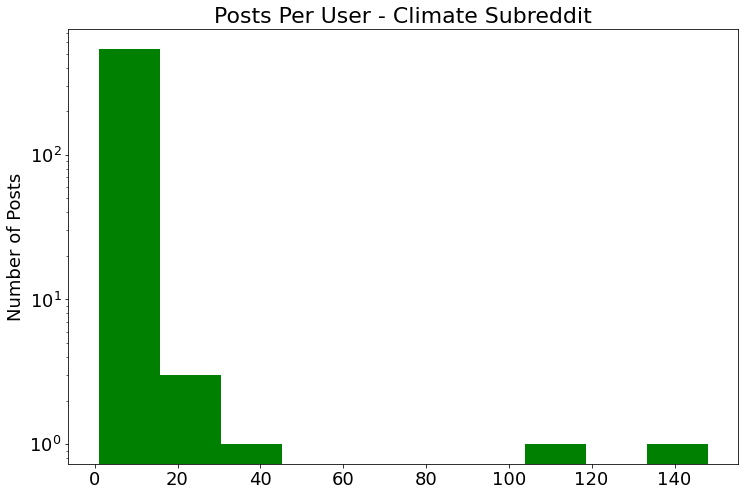

In [257]:
plt.figure(figsize=(12,8))
plt.title("Posts Per User - Climate Subreddit", fontsize=22);


plt.yscale('log')
plt.ylabel('Number of Posts', fontsize=18)

plt.hist(climate_post_per_user, color = 'green');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

Let's now see the frequency of posting by user in the energy subreddit.

In [228]:
print(energy['author'].value_counts())

mafco                   83
chopchopped             69
catawbasam              30
Venehindustrial         29
Hyric89                 28
                        ..
TrainsareFascinating     1
opinionatedthings        1
libertycountylandman     1
abragamss                1
StonerMeditation         1
Name: author, Length: 451, dtype: int64


In [252]:
energy_post_per_user = energy.groupby('author')['title'].count()

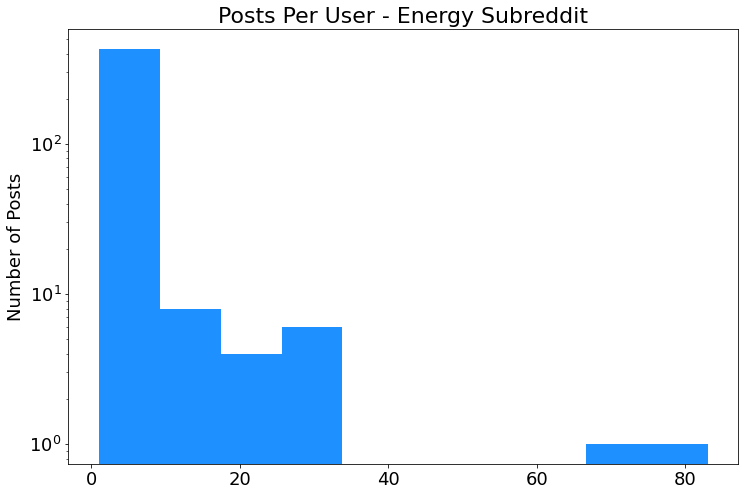

In [256]:
plt.figure(figsize=(12,8))
plt.title("Posts Per User - Energy Subreddit", fontsize=22);


plt.yscale('log')
plt.ylabel('Number of Posts', fontsize=18)
plt.hist(energy_post_per_user, color = 'dodgerblue');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

### Let's create columns for each dataframe that count the length of each post title

In [217]:
climate['word_count'] = climate['title'].str.count(' ') + 1

In [218]:
climate['word_count'].mean()

15.041666666666666

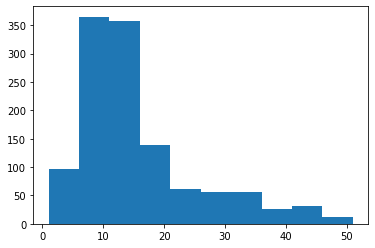

In [258]:
plt.hist(climate['word_count']);

In [221]:
energy['word_count'] = energy['title'].str.count(' ') + 1

In [222]:
energy['word_count'].mean()

16.49

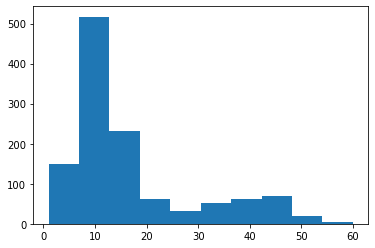

In [235]:
plt.hist(energy['word_count']);

Above, we can see the word counts of each post for both subreddits. The energy subreddit tends to have a higher occurence of longer posts, while the climate subreddit has more posts in the range of 5-25 words.

### Let's utilize CountVectorizer to examine the frequency of word occurences between these two subreddits

In [151]:
stops = ['climate', 'change', 'energy']

In [152]:
stops

['climate', 'change', 'energy']

In [153]:
# Credit to https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list
stop_words = text.ENGLISH_STOP_WORDS.union(stops)


In [154]:
# Instantiate CountVectorizer
cvec_energy = CountVectorizer(stop_words=stop_words)
cvec_climate = CountVectorizer(stop_words=stop_words)

In [155]:
# Fit our subreddit titles
cvec_energy.fit(energy['title'])
cvec_climate.fit(climate['title'])

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [156]:
#reddit_title = cvec_reddit.transform(reddit['title'])
energy_title = cvec_energy.transform(energy['title'])
climate_title = cvec_climate.transform(climate['title'])



In [158]:
cvec_energy.get_feature_names()[1000:1010]

['cooling',
 'cooming',
 'cooperation',
 'copy',
 'cords',
 'core',
 'coriolis',
 'corn',
 'coronavirus',
 'corporation']

In [159]:
cvec_climate.get_feature_names()[1000:1010]

['descarga',
 'descargar',
 'descended',
 'desertification',
 'deserts',
 'designed',
 'desolate',
 'desperately',
 'despite',
 'destroyed']

In [160]:
energy_titles_df = pd.DataFrame(energy_title.todense(),
                        columns=cvec_energy.get_feature_names())

In [161]:
energy_titles_df.head()

,00,000,01,03,0304,057,08,0t,10,100,...,zealots,zen,zero,zinc,zone,zx,énergie,ørsted,đẹp,şehi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
climate_titles_df = pd.DataFrame(climate_title.todense(),
                        columns=cvec_climate.get_feature_names())

In [163]:
climate_titles_df.head()

,000,02,03,06,10,100,100ish,100m,10k,11,...,zombie,zones,zoom,zu,الامراض,البيئة,انتشار,سبب,صحة,لخفض
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
energy_titles_df.sum().sort_values(ascending=False).head(25)

hydrogen       200
power          165
solar          163
oil            125
new            119
coal           102
wind            92
fuel            87
nuclear         85
gas             75
renewable       68
electric        65
world           64
green           60
storage         56
production      50
battery         50
electricity     48
industry        48
market          46
grid            45
renewables      43
global          42
year            41
clean           41
dtype: int64

In [165]:
climate_titles_df.sum().sort_values(ascending=False).head(25)

new            106
crisis          73
global          68
carbon          68
world           68
emissions       63
trump           60
fossil          58
fuel            49
oil             44
biden           43
coronavirus     41
2020            41
warming         37
arctic          37
gas             36
record          35
ice             35
planet          34
action          34
years           33
year            32
study           31
plan            31
australia       31
dtype: int64

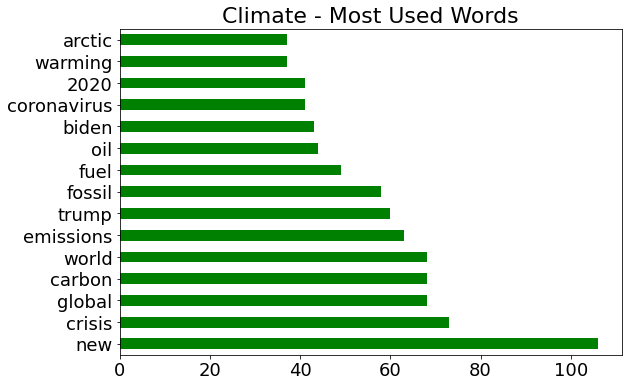

In [264]:
plt.figure(figsize=(9,6))

plt.title("Climate - Most Used Words", fontsize=22);


climate_titles_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='green');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

Above, we can see the most common words found on the climate subreddit. "New" is the most common, which likely reflects the release of new data regarding the climate. Additionally, several words that likely have crossover with energy can be observed, including "oil" and "fuel."

In [167]:
energy_titles_df = pd.DataFrame(energy_title.todense(),
                        columns=cvec_energy.get_feature_names())

In [168]:
energy_titles_df.sum().sort_values(ascending=False).head(15)

hydrogen     200
power        165
solar        163
oil          125
new          119
coal         102
wind          92
fuel          87
nuclear       85
gas           75
renewable     68
electric      65
world         64
green         60
storage       56
dtype: int64

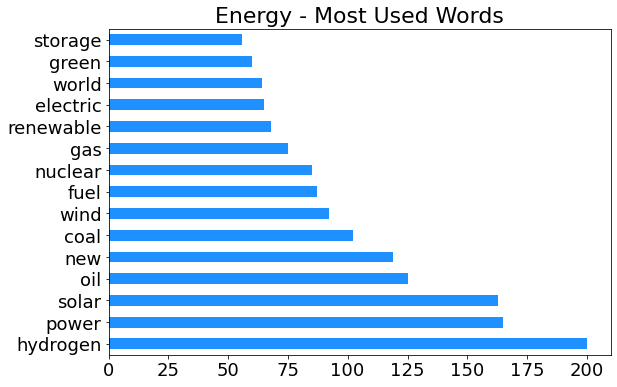

In [265]:
plt.figure(figsize=(9,6))

plt.title("Energy - Most Used Words", fontsize=22);


energy_titles_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='dodgerblue');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

# Word Clouds

In [170]:
words = energy_titles_df.loc

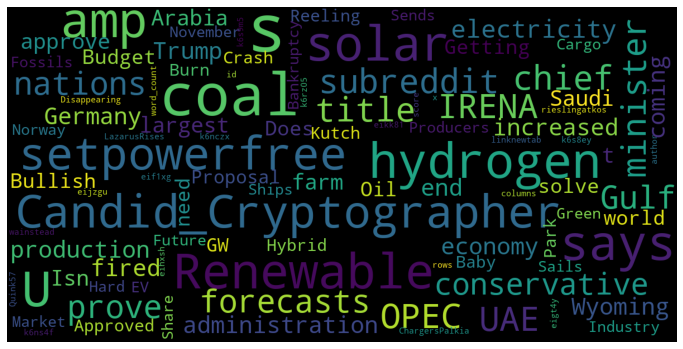

In [174]:
# import necessary libraries
#https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud, STOPWORDS


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stop_words,
        max_words=1000,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(energy.loc[energy['subreddit'] == 'energy'])

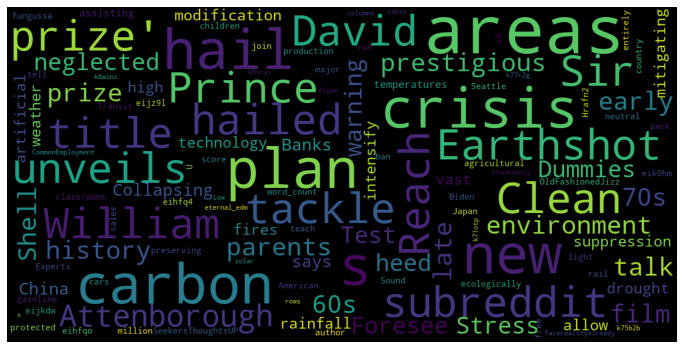

In [173]:
# import necessary libraries
from wordcloud import WordCloud, STOPWORDS


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stop_words,
        max_words=1000,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(climate.loc[climate['subreddit'] == 'climate'])